<a href="https://colab.research.google.com/github/Karimi-Gichunge/IP_Core_Week_6/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2020_09_Winfred_Karimi_PythonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football prediction

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> To create a model that will predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly while checking the rankings of the team.

### b) Defining the Metric for Success

The project will be considered a success if the models created are able to predict results of a game to an assurity of above 80%

### c) Understanding the context 

The men's FIFA World Ranking is a ranking system for men's national teams in association football. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992.

**How the rankings are calculated:**

The rankings are calculated using an algorithm called Elo.
The Elo method of calculation adds/subtracts points (as opposed to averaging points) for individual
matches to/from a team’s existing point total. The points which are added or subtracted are partially
determined by the relative strength of the two opponents, including the logical expectation that teams
higher in the ranking should fare better against teams lower in the ranking.




### d) Experimental design taken

In this study, we will be conducting Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables. We will also create models using polynomial regression and logistic regression


### e) Data Relevance

We will be using data two datasets


1.  FIFA rankings from 1993 to 2018 as fifa_rankings.csv

This one shows the FIFA ranking and points for the teams. It shows a monthly ranking of team performance
2.  International Soccer matches from 1872 to 2019 as results.csv

This one shows teams, scores, tournament type and country the game was played from

Both our datasets consists of information on football rankings over time and are therefore suitable to create a model that will be used to predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly while checking the rankings of the team.



## 2. Reading the Data

In [1]:
#First we will import the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
# Loading the Data from the source
# ---
ranking = pd.read_csv('fifa_ranking.csv')
#Previewing the upper part of the data
ranking.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [3]:
#Previewing the lower part of the data
ranking.tail(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [4]:
# Loading the results Dataframe 
# ---
results = pd.read_csv('results.csv')
#Previewing the upper part of the data
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


## 3. Checking the Datasets

In [6]:
# Determining the no. of records in our dataset
#
print("The respective rows and columns for the ranking dataset: ", ranking.shape)
print("The respective rows and columns for the results dataset: ", results.shape)


The respective rows and columns for the ranking dataset:  (57793, 16)
The respective rows and columns for the results dataset:  (40839, 9)


In [7]:
#Getting column names
print("Columns for ranking dataset: ")
print(ranking.columns)
print("*****************")
print("Columns for results dataset: ")
print(results.columns)

Columns for ranking dataset: 
Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')
*****************
Columns for results dataset: 
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')


In [8]:
# Checking whether each column has an appropriate datatype

print("Datatypes for ranking dataset: ")
print(ranking.dtypes)
print("*****************")
print("Datatypes for results dataset: ")
print(results.dtypes)


Datatypes for ranking dataset: 
rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
*****************
Datatypes for results dataset: 
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


## 4. Tidying the Dataset

In [9]:
#First, we change the columns containing dates from the datatype object
#to datetime in both datasets
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])
results['date'] = pd.to_datetime(results['date'])

In [10]:
#Checking for null values
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [11]:
ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [12]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [13]:
# Checking for Anomalies
ranking['country_full'].unique()

array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
       'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
       "Côte d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
       'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
       'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
       'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
       'Zimbabwe', 'Qatar', 'Australia', 'Iceland', 'IR Iran',
       'United Arab Emirates', 'Yugoslavia', 'Iraq', 'Senegal', 'Bolivia',
       'Kuwait', 'Korea DPR', 'El Salvador', 'Turkey', 'Gabon', 'Guinea',
       'Thailand', 'Paraguay', 'Malawi', 'Israel', 'Peru', 'Zaire',
       'Cyprus', 'Singapore', 'Mali', 'Malaysia', 'Bermuda', 'Niger',
       'Syria', 'Bahr

In [14]:
results['country'].unique()

array(['Scotland', 'England', 'Wales', 'Republic of Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Bohemia', 'Switzerland',
       'Sweden', 'Germany', 'Italy', 'Chile', 'Norway', 'Finland',
       'Luxembourg', 'Russia', 'Denmark', 'Spain', 'Japan', 'Brazil',
       'Paraguay', 'China PR', 'Canada', 'Estonia', 'Guatemala',
       'Czechoslovakia', 'Poland', 'Yugoslavia', 'New Zealand', 'Romania',
       'Latvia', 'Portugal', 'Northern Ireland', 'Australia', 'Lithuania',
       'Turkey', 'Mexico', 'Aruba', 'Soviet Union', 'Haiti',
       'Philippines', 'Bulgaria', 'Jamaica', 'Kenya', 'Czech Republic',
       'Peru', 'Honduras', 'British Guyana', 'Uganda', 'El Salvador',
       'Barbados', 'Irish Free State', 'Trinidad and Tobago', 'Greece',
       'Curaçao', 'Egypt', 'Dominica', 'Guadeloupe', 'Palestine',
       'Netherlands Guyana', 'French Guiana', 'Cuba', 'Colombia',
       'Saint Kitts and Nevis', 'Éire', 

In [15]:
#Ensuring that country names appear similarly in both datasets
results =  results.replace({'Germany DR': 'Germany'})
ranking = ranking.replace({"IR Iran": "Iran"})

To continue with cleaning the dataset and further move to feature engineering, it is important for us to gauge which variables will be necessary for our analysis and also classify which variables will be used as features and which will be the target.

**Target**: Since we are creating a model that can predict results of a football match, **results will be our target**

**Features**: the following will be the features used in the model to predict the results; **rank, country, weighted_points, year, home_team, away_team, home_score, away_score tournament**

In [17]:
#Droppping columns
rankings = ranking.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted',
                          'rank_date','two_year_ago_weighted', 'three_year_ago_weighted']] 
rankings.head(2)                         

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted
0,1,Germany,GER,0.0,1993-08-08,0.0,0.0
1,2,Italy,ITA,0.0,1993-08-08,0.0,0.0


In [18]:
#Calculating the weighted points
rankings['weighted_points'] =  rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted'] + rankings['three_year_ago_weighted']
rankings.head(2)

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,1,Germany,GER,0.0,1993-08-08,0.0,0.0,0.0
1,2,Italy,ITA,0.0,1993-08-08,0.0,0.0,0.0


Rankings points on the fifa ranking dataset started from 21/09/2011, we will threfore use data from 21/09/2011 onwards for this analysis

In [21]:
rankings_df = rankings[rankings['rank_date'] > '2011-08-24']
results_df = results[results['date'] > '2011-08-24']
print("Shape of rankings_df: ", rankings_df.shape)
print("Shape of results_df: ", results_df.shape)

Shape of rankings_df:  (17208, 8)
Shape of results_df:  (7558, 9)


In [23]:
#Now we change the columns containing dates to year
import datetime

rankings_df['year'] = rankings_df['rank_date'].dt.year
rankings_df.tail()


,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted,weighted_points,year
57788,206,Anguilla,AIA,0.0,2018-06-07,0.0,0.0,0.0,2018
57789,206,Bahamas,BAH,0.0,2018-06-07,0.0,0.0,0.0,2018
57790,206,Eritrea,ERI,0.0,2018-06-07,0.0,0.0,0.0,2018
57791,206,Somalia,SOM,0.0,2018-06-07,0.0,0.0,0.0,2018
57792,206,Tonga,TGA,0.0,2018-06-07,0.0,0.0,0.0,2018


In [24]:
results_df['year'] = results_df['date'].dt.year
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
33281,2011-08-25,United Arab Emirates,Qatar,3,1,Friendly,al-Ain,United Arab Emirates,False,2011
33282,2011-08-26,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False,2011
33283,2011-08-27,Angola,DR Congo,1,2,Friendly,Dundo,Angola,False,2011
33284,2011-08-27,Fiji,Tahiti,3,0,Pacific Games,Boulari,New Caledonia,True,2011
33285,2011-08-27,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False,2011


The rankings_df runs from the year 2011 to the year 2018 whereas the results_df runs to the year 2019. For data balance we will remove data for the year 2019 in the results_df

In [26]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 33281 to 40838
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        7558 non-null   datetime64[ns]
 1   home_team   7558 non-null   object        
 2   away_team   7558 non-null   object        
 3   home_score  7558 non-null   int64         
 4   away_score  7558 non-null   int64         
 5   tournament  7558 non-null   object        
 6   city        7558 non-null   object        
 7   country     7558 non-null   object        
 8   neutral     7558 non-null   bool          
 9   year        7558 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(5)
memory usage: 597.8+ KB


In [27]:
#Standardizing the dataset
results_df = results_df[results_df['year'] < 2019]
results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40346,2018-12-30,Yemen,Syria,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40347,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40348,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,2018
40349,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,2018
40350,2018-12-31,Qatar,Iran,1,2,Friendly,Doha,Qatar,False,2018


In [28]:
#Dropping unnecessary columns
rankings_data = rankings_df[['rank', 'country_full', 'weighted_points', 'year']]
rankings_data = rankings_data.groupby(['year', 'country_full'], as_index=False).agg({'rank': 'mean', 'weighted_points': 'mean'})
rankings_data.head(3)

,year,country_full,rank,weighted_points
0,2011,Afghanistan,180.50,75.3975
1,2011,Albania,72.75,302.0700
2,2011,Algeria,35.25,557.0125


In [29]:
results_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year'],
      dtype='object')

In [32]:
#Dropping columns for results dataset
results_data = results_df[['home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'year']]
results_data.reset_index(drop=True, inplace=False).head(3)      

,home_team,away_team,home_score,away_score,tournament,country,year
0,United Arab Emirates,Qatar,3,1,Friendly,United Arab Emirates,2011
1,Bahrain,Sudan,1,0,Friendly,Bahrain,2011
2,Angola,DR Congo,1,2,Friendly,Angola,2011


In [35]:
#Joining both tables to form one dataset
data = results_data.merge(rankings_data, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
data = data.merge(rankings_data, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
data.drop(['country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
data.head()

,home_team,away_team,home_score,away_score,tournament,rank_x,weighted_points_x,rank_y,weighted_points_y
0,United Arab Emirates,Qatar,3,1,Friendly,118.75,161.6250,95.0,311.495
1,Bahrain,Qatar,0,0,FIFA World Cup qualification,101.50,282.6375,95.0,311.495
2,Indonesia,Qatar,2,3,FIFA World Cup qualification,141.25,151.8750,95.0,311.495
3,United Arab Emirates,Kuwait,2,3,FIFA World Cup qualification,118.75,161.6250,98.5,255.315
4,Oman,Kuwait,1,0,Friendly,96.50,289.5250,98.5,255.315


In [38]:
#Changing column names
data.rename(columns={'rank_x':'home_team_rank',
                     'rank_y':'away_team_rank',
                     'weighted_points_x':'home_team_weighted_points',
                     'weighted_points_y':'away_team_weighted_points'}, 
                 inplace=True)
 
data.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points
0,United Arab Emirates,Qatar,3,1,Friendly,118.75,161.6250,95.0,311.495
1,Bahrain,Qatar,0,0,FIFA World Cup qualification,101.50,282.6375,95.0,311.495
2,Indonesia,Qatar,2,3,FIFA World Cup qualification,141.25,151.8750,95.0,311.495
3,United Arab Emirates,Kuwait,2,3,FIFA World Cup qualification,118.75,161.6250,98.5,255.315
4,Oman,Kuwait,1,0,Friendly,96.50,289.5250,98.5,255.315


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 0 to 5736
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   home_team                  5737 non-null   object 
 1   away_team                  5737 non-null   object 
 2   home_score                 5737 non-null   int64  
 3   away_score                 5737 non-null   int64  
 4   tournament                 5737 non-null   object 
 5   home_team_rank             5737 non-null   float64
 6   home_team_weighted_points  5737 non-null   float64
 7   away_team_rank             5737 non-null   float64
 8   away_team_weighted_points  5737 non-null   float64
 9   Status                     5737 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 493.0+ KB


Our merged dataset has no null values and the datatypes are also appropriate hence no more data cleaning required, we therefore move to EDA

## 5. Exploratory Data Analysis

In [46]:
data.describe()

,home_score,away_score,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points
count,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000
mean,1.526756,1.048283,81.365656,397.851981,84.673131,380.139970
std,1.497798,1.222296,53.760750,261.660895,54.160607,254.211004
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,35.000000,200.085000,38.916667,187.636667
50%,1.000000,1.000000,76.416667,343.468333,79.500000,331.887500
75%,2.000000,2.000000,121.666667,545.732500,124.416667,531.563333
max,15.000000,10.000000,207.916667,1264.343333,207.000000,1264.343333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9632615400>,
      dtype=object)

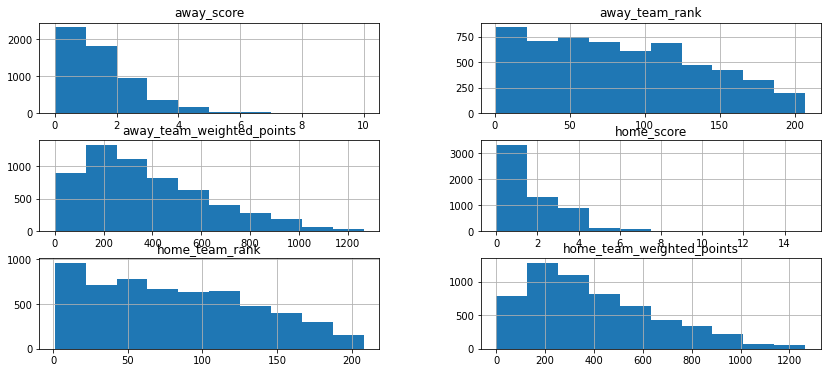

In [48]:
#Checking for data distribution
data.hist(bins=10, figsize=[14,6])

Our data is not normally distributed

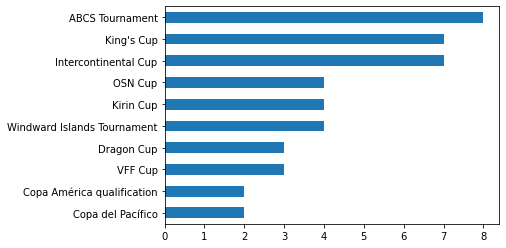

In [54]:
#Checking tournament type value counts
data.tournament.value_counts().sort_values().head(10).plot(kind = 'barh')
#The tournament type ABCS recorded the highest number of matches

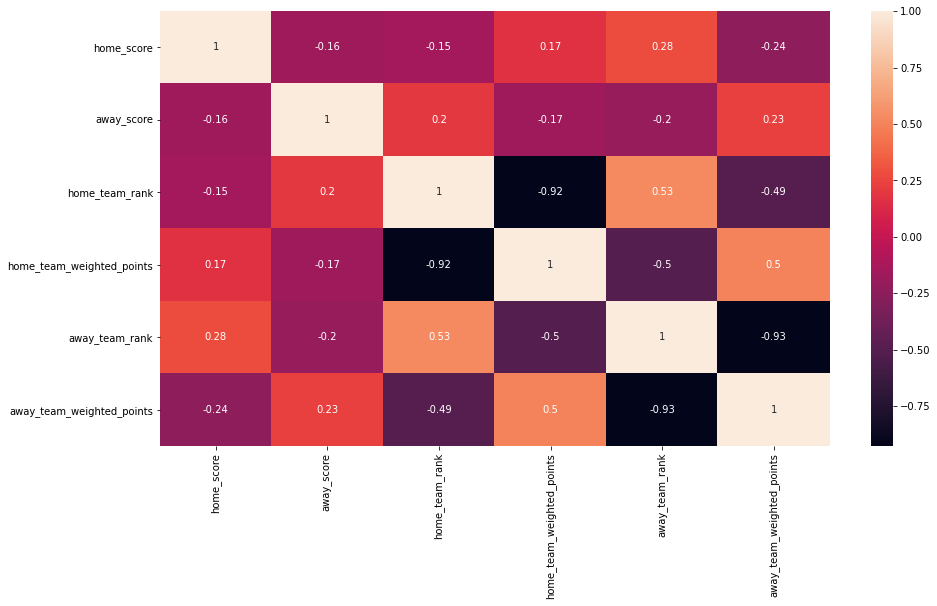

In [49]:
#Checking for feature correlation
plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(method='pearson'), annot=True)

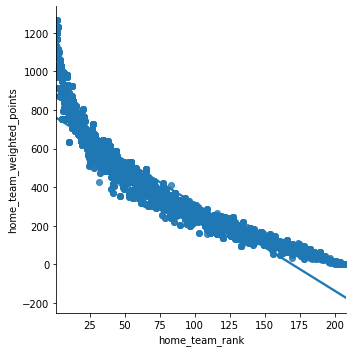

In [50]:
 sns.lmplot(x="home_team_rank", y="home_team_weighted_points", data=data)

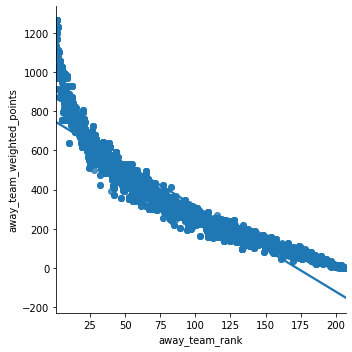

In [51]:
sns.lmplot(x="away_team_rank", y="away_team_weighted_points", data=data)

There is a strong negative correlation between rank and weigted points for teams: The teams with very high weighted points rank high and those with low weighted points rank the least, for example a team with aweighted points at 1400 ranks first and vice versa 

Other features show a weak correlation




In [73]:
home = data[['home_team', 'home_score']].rename(columns={'home_team':'team', 'home_score':'score'})
away = data[['away_team', 'away_score']].rename(columns={'away_team':'team', 'away_score':'score'})
# merge it into one
team_score = home.append(away).reset_index(drop=True)
# make an aggregation of the the score column group by the team
country_info = team_score.groupby('team')['score'].agg(['sum','count','mean']).reset_index()
country_info = country_info.rename(columns={'sum':'nb_goals', 'count':'nb_matches', 'mean':'goal_avg'})
del home,away
country_info.tail()

,team,nb_goals,nb_matches,goal_avg
191,Vietnam,88,55,1.600000
192,Wales,73,62,1.177419
193,Yemen,33,56,0.589286
194,Zambia,123,110,1.118182
195,Zimbabwe,109,79,1.379747


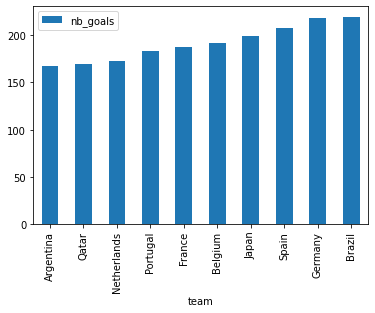

In [75]:
#Top 10 countries by number of goals
country_info.nlargest(10,['nb_goals']).sort_values(by='nb_goals').plot(kind='bar',x='team',y='nb_goals')

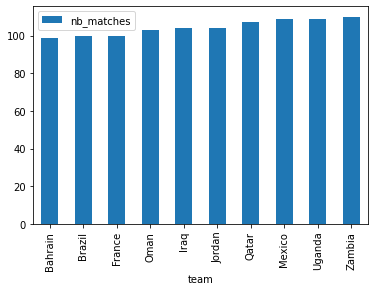

In [77]:
#Top 10 countries by number of goals
country_info.nlargest(10, ['nb_matches']).sort_values(by='nb_matches').plot(kind='bar',x='team',y='nb_matches')

## 6. Feature Engineering

First we create a new column 'Status' that contains results on whether a match was a win, lose or draw from the home team perspective

In [44]:
#Creating a new column 'Status' 
def f(row):
    if row['home_score'] == row['away_score']:
        val = 'Draw'
    elif row['home_score'] > row['away_score']:
        val = 'Win'
    else:
        val = 'Lose'
    return val

data['Status'] = data.apply(f, axis=1)

data.head(2)

,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points,Status
0,United Arab Emirates,Qatar,3,1,Friendly,118.75,161.6250,95.0,311.495,Win
1,Bahrain,Qatar,0,0,FIFA World Cup qualification,101.50,282.6375,95.0,311.495,Draw


Then we change the categorical columns into binary

In [57]:
#Change status and tournament to categories
data['tournament'] = data['tournament'].astype('category')
data['Status'] = data['Status'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 0 to 5736
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   home_team                  5737 non-null   object  
 1   away_team                  5737 non-null   object  
 2   home_score                 5737 non-null   int64   
 3   away_score                 5737 non-null   int64   
 4   tournament                 5737 non-null   category
 5   home_team_rank             5737 non-null   float64 
 6   home_team_weighted_points  5737 non-null   float64 
 7   away_team_rank             5737 non-null   float64 
 8   away_team_weighted_points  5737 non-null   float64 
 9   Status                     5737 non-null   category
dtypes: category(2), float64(4), int64(2), object(2)
memory usage: 416.3+ KB


In [45]:
data['tournament'].unique()

array(['Friendly', 'FIFA World Cup qualification', 'CECAFA Cup',
       'African Cup of Nations qualification', 'Pacific Games',
       'Oceania Nations Cup qualification', 'ABCS Tournament',
       'UEFA Euro qualification', 'Dragon Cup', 'SAFF Cup',
       'African Cup of Nations', 'UAFA Cup',
       'African Nations Championship', 'WAFF Championship', 'UEFA Euro',
       'Copa del Pacífico', 'AFC Challenge Cup', 'AFF Championship',
       'EAFF Championship', 'Nehru Cup', "King's Cup", 'VFF Cup',
       'Baltic Cup', 'CFU Caribbean Cup qualification',
       'CFU Caribbean Cup', 'Oceania Nations Cup', 'Gulf Cup',
       'AFC Asian Cup qualification', 'AFC Challenge Cup qualification',
       'COSAFA Cup', 'Confederations Cup', 'OSN Cup', 'Gold Cup',
       'UNCAF Cup', 'FIFA World Cup', 'Windward Islands Tournament',
       'AFC Asian Cup', 'Copa América', 'Kirin Cup',
       'Copa América qualification', 'UEFA Nations League',
       'Intercontinental Cup'], dtype=object)

In [62]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Status'. 
data['Status']= label_encoder.fit_transform(data['Status']) 
  
print(data['Status'].unique()) 
data.head()
#Where 2:win, 1: lose, 0:Draw

[2 0 1]


,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points,Status
0,United Arab Emirates,Qatar,3,1,Friendly,118.75,161.6250,95.0,311.495,2
1,Bahrain,Qatar,0,0,FIFA World Cup qualification,101.50,282.6375,95.0,311.495,0
2,Indonesia,Qatar,2,3,FIFA World Cup qualification,141.25,151.8750,95.0,311.495,1
3,United Arab Emirates,Kuwait,2,3,FIFA World Cup qualification,118.75,161.6250,98.5,255.315,1
4,Oman,Kuwait,1,0,Friendly,96.50,289.5250,98.5,255.315,2


In [63]:
# Encode labels in column 'touranament'. 
data['tournament']= label_encoder.fit_transform(data['tournament']) 
  
print(data['tournament'].unique()) 
data.head()


[22 21 10  7 32 31  0 36 18 33  6 34  8 40 35 17  3  5 19 28 26 39  9 12
 11 30 24  2  4 13 14 29 23 38 20 41  1 15 27 16 37 25]


,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points,Status
0,United Arab Emirates,Qatar,3,1,22,118.75,161.6250,95.0,311.495,2
1,Bahrain,Qatar,0,0,21,101.50,282.6375,95.0,311.495,0
2,Indonesia,Qatar,2,3,21,141.25,151.8750,95.0,311.495,1
3,United Arab Emirates,Kuwait,2,3,21,118.75,161.6250,98.5,255.315,1
4,Oman,Kuwait,1,0,22,96.50,289.5250,98.5,255.315,2


As explained earlier we will use Polynomial Regression and logistic Regression for this study.
For polynomial approach we will use two models:

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

We will separate our data into two to prepare it for modelling using both models


In [78]:
data.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'home_team_rank', 'home_team_weighted_points', 'away_team_rank',
       'away_team_weighted_points', 'Status'],
      dtype='object')

In [109]:
home = data[['home_score', 'tournament', 'home_team_rank','away_team_rank', 'home_team_weighted_points']]
home.head(3)

,home_score,tournament,home_team_rank,away_team_rank,home_team_weighted_points
0,3,22,118.75,95.0,161.6250
1,0,21,101.50,95.0,282.6375
2,2,21,141.25,95.0,151.8750


In [110]:
away =data[['away_score', 'tournament','home_team_rank', 'away_team_rank', 'away_team_weighted_points']]
away.head(2)

,away_score,tournament,home_team_rank,away_team_rank,away_team_weighted_points
0,1,22,118.75,95.0,311.495
1,0,21,101.50,95.0,311.495


## 7. Checking for multicollinearlity

In [111]:
#Dropping target variable
ind_home = home.drop(columns=['home_score'])

In [112]:
correlations = ind_home.corr()
correlations

,tournament,home_team_rank,away_team_rank,home_team_weighted_points
tournament,1.000000,-0.184170,-0.183864,0.198956
home_team_rank,-0.184170,1.000000,0.528137,-0.923834
away_team_rank,-0.183864,0.528137,1.000000,-0.501706
home_team_weighted_points,0.198956,-0.923834,-0.501706,1.000000


In [113]:
#Checking for multicollinearlity in the home dataset
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,tournament,home_team_rank,away_team_rank,home_team_weighted_points
tournament,1.051923,-0.051443,0.122594,-0.195305
home_team_rank,-0.051443,7.097409,-0.618914,6.256549
away_team_rank,0.122594,-0.618914,1.403615,0.108038
home_team_weighted_points,-0.195305,6.256549,0.108038,6.873072




home_team_rank and home_team_weighted_points has a value approaching 7,meaning critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable. We remove one of them from our dataset to check if the VIF of our dataset will improve. 

In [114]:
#Dropping the column for weighted points
ind_home = ind_home.drop(columns=['home_team_weighted_points'])
correlations = ind_home.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,tournament,home_team_rank,away_team_rank
tournament,1.046374,0.126343,0.125664
home_team_rank,0.126343,1.402080,-0.717260
away_team_rank,0.125664,-0.717260,1.401917


The VIF for home_team_rank has dropped drastically to a value of 1

In [115]:
#Checking for multicollinearlity in the away dataset
ind_away = away.drop(columns=['away_score', 'away_team_weighted_points'])
correlations = ind_away.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,tournament,home_team_rank,away_team_rank
tournament,1.046374,0.126343,0.125664
home_team_rank,0.126343,1.402080,-0.717260
away_team_rank,0.125664,-0.717260,1.401917


We separate the target and remove the weighted points column, the VIF turns out great

In [127]:
#Checking for multicollinearlity in the data datasets
#(We will use this dataset for logistic regression)
#Checking for multicollinearlity in the away dataset
matches = data.drop(columns=['Status'])
correlations = matches.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,tournament,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points
home_score,1.269370,-0.027232,0.011466,0.283421,-0.280219,-0.737329,-0.094806
away_score,-0.027232,1.226536,-0.019620,-0.573384,-0.037425,0.230368,-0.330083
tournament,0.011466,-0.019620,1.061358,0.004751,-0.148242,-0.124150,-0.253951
home_team_rank,0.283421,-0.573384,0.004751,7.644301,6.456155,-2.054350,-1.146166
home_team_weighted_points,-0.280219,-0.037425,-0.148242,6.456155,7.201513,-1.019485,-1.367319
away_team_rank,-0.737329,0.230368,-0.124150,-2.054350,-1.019485,8.077120,6.772425
away_team_weighted_points,-0.094806,-0.330083,-0.253951,-1.146166,-1.367319,6.772425,7.492275


The VIF for team ranks and weighted points are very high, therefore we remove the columns for team weighted points and check for multicollinearlity again

In [128]:
matches = matches.drop(columns=['home_team_weighted_points', 'away_team_weighted_points'])
correlations = matches.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,tournament,home_team_rank,away_team_rank
home_score,1.255438,-0.035588,-0.000075,0.536267,-0.642367
away_score,-0.035588,1.210622,-0.033541,-0.536120,0.531777
tournament,-0.000075,-0.033541,1.047304,0.140756,0.111461
home_team_rank,0.536267,-0.536120,0.140756,1.855482,-1.212819
away_team_rank,-0.642367,0.531777,0.111461,-1.212819,1.948642


The values for the VIF have dropped to an acceptable score hence for modelling we will not use the feature for team weighted points

## 8. Modelling

### **Logistic Regression**

**Data**

In [130]:
matches = data.drop(columns=['home_team_weighted_points', 'away_team_weighted_points'])
matches.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,Status
0,United Arab Emirates,Qatar,3,1,22,118.75,95.0,2
1,Bahrain,Qatar,0,0,21,101.50,95.0,0
2,Indonesia,Qatar,2,3,21,141.25,95.0,1
3,United Arab Emirates,Kuwait,2,3,21,118.75,98.5,1
4,Oman,Kuwait,1,0,22,96.50,98.5,2


We want to predict from the home_team view, whether a game will be a win(2), lose(1) or a draw(0).

Therefore, our target is Status, and the rest of the variables are the features.

**Modelling**

In [132]:
#Splitting the data
X = matches.iloc[:, 2:7].values
y = matches.iloc[:, 7].values
print(X)
print(y)

[[  3.           1.          22.         118.75        95.        ]
 [  0.           0.          21.         101.5         95.        ]
 [  2.           3.          21.         141.25        95.        ]
 ...
 [  2.           5.           7.         154.66666667 144.5       ]
 [  3.           0.           7.          91.66666667 154.66666667]
 [  1.           1.           7.         127.5        168.66666667]]
[2 0 1 ... 1 2 0]


In [133]:
#Training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [134]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)
y_pred

array([0, 1, 0, ..., 2, 1, 0])

In [136]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[278,   0,   0],
       [  0, 323,   0],
       [  0,   0, 547]])

The confusion matrix tells us that 278 matches were draws and the model predicted them, the model predicted that the home team won 547 matches and it actually won them,and home teams lost 323 matches which were predicted by the model

In [139]:
#accuracy score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 1.00


### Challenging the solution

**Hyperparameter tuning**

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
num_folds=10
num_folds = 10
seed = 7
scoring = 'accuracy'
results = []
names = []
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
penalty = ['l1', 'l2']
param_grid = dict(C=c_values, penalty=penalty)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))

Best: 1.0 using {'C': 0.1, 'penalty': 'l2'}


**Validating the model**

In [145]:
#Data preparation
scaler = StandardScaler().fit(X_train)
s_X = scaler.transform(X_train)
model = LogisticRegression(C=0.1, penalty='l2')
model.fit(s_X, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
from sklearn.metrics import accuracy_score
#Estimating accurancy
s_X_test = scaler.transform(X_test)
predictions = model.predict(s_X_test)
print(accuracy_score(y_test, predictions))


1.0


### **Residual plotting**

In [186]:
residuals = np.subtract(y_pred, y_test)
pd.DataFrame(residuals).describe()

residuals.mean()

0.0

There are no residuals in logistic model

### **Polynomial Regression**

For polynomial approach, we will first create model 1 then 2 

**Polynomial Regression: Model 1**

**Dimensionality Reduction**


In [123]:
#Import libaries
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline


In [162]:
#Data
home_df= home.drop(columns=['diff'])
home_df.tail()

,home_score,tournament,home_team_rank,away_team_rank
5732,1,22,141.833333,144.500000
5733,1,7,91.666667,144.500000
5734,2,7,154.666667,144.500000
5735,3,7,91.666667,154.666667
5736,1,7,127.500000,168.666667


**Modelling**

In [167]:
#Splitting the data
# Split the dataset into train and test sets

X = home_df.iloc[:, 1:4].values
y = home_df.iloc[:, 0].values
print(X)
print(y)
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


[[ 22.         118.75        95.        ]
 [ 21.         101.5         95.        ]
 [ 21.         141.25        95.        ]
 ...
 [  7.         154.66666667 144.5       ]
 [  7.          91.66666667 154.66666667]
 [  7.         127.5        168.66666667]]
[3 0 2 ... 2 3 1]


In [175]:
X.shape

(5737, 3)

In [178]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

X_poly.shape
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [184]:

print("The model explains {:.2f}% .".format(pol_reg.score(X_poly,y)*100))

The model explains 22.38% .


In [196]:
# Predict using Polynomial Regression
#poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
#print('Polynomial prediction: %d' %poly_pred)
a = pol_reg.coef_
b = pol_reg.intercept_
print(a)
print(b)

[ 0.00000000e+00  1.23474170e-02 -1.60254877e-02  8.56793282e-03
 -3.24931270e-04  8.42057713e-05 -1.17196498e-04  4.30768710e-05
 -5.75322063e-05  6.84820781e-05]
1.4547950856487075
